In [1]:
import pandas as pd

df = pd.read_excel("Indices weed-crop.xlsx", sheet_name="PCA-P")


In [3]:
df.head()       # Shows the first five rows
df.info()       # Gives an overview of columns, data types, and non-null counts
df.describe()   # Provides summary statistics for numeric columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   species  379 non-null    object 
 1   PSSRa    379 non-null    float64
 2   PSSRb    379 non-null    float64
 3   RARSc    379 non-null    float64
 4   PSSRc    379 non-null    float64
 5   CARI     379 non-null    float64
dtypes: float64(5), object(1)
memory usage: 17.9+ KB


,PSSRa,PSSRb,RARSc,PSSRc,CARI
count,379.000000,379.000000,379.000000,379.000000,379.000000
mean,7.300467,6.347584,6.122671,6.149898,1.919156
std,1.517251,1.350003,1.355932,1.371763,0.456210
min,4.462164,3.649889,3.480319,3.464069,0.907283
25%,5.986514,5.210576,4.822342,4.833785,1.511847
50%,7.160828,6.267649,6.264662,6.300172,1.988189
75%,8.363482,7.322649,7.118963,7.168612,2.260592
max,10.878288,9.811643,9.172213,9.222778,3.005503


Accuracy: 0.6447368421052632


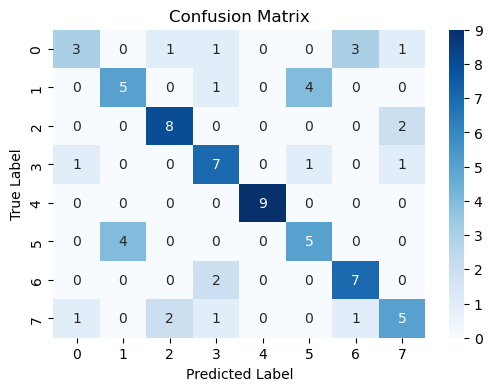

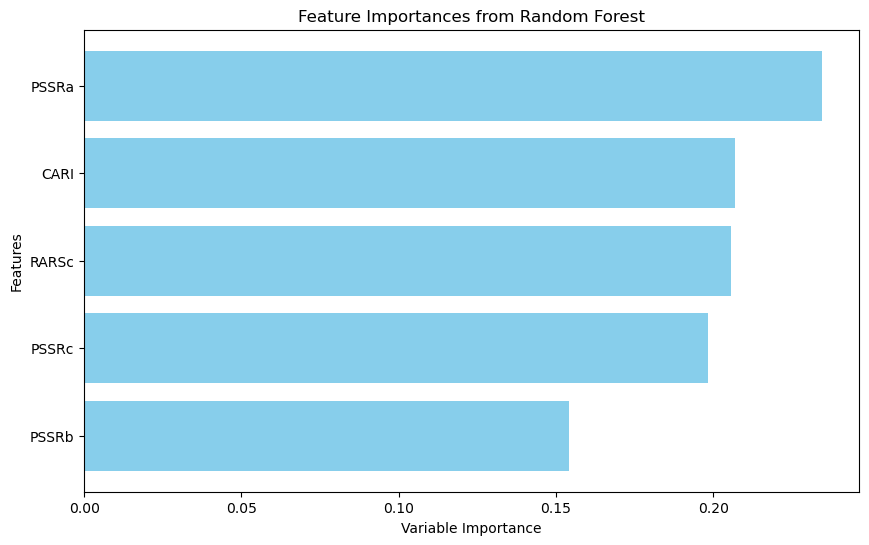

              precision    recall  f1-score   support

       ASGPR       0.60      0.33      0.43         9
       BROSS       0.56      0.50      0.53        10
    Camelina       0.73      0.80      0.76        10
      Canola       0.58      0.70      0.64        10
       DIPMU       1.00      1.00      1.00         9
       LOLMU       0.50      0.56      0.53         9
       PAPRH       0.64      0.78      0.70         9
      Salvia       0.56      0.50      0.53        10

    accuracy                           0.64        76
   macro avg       0.64      0.65      0.64        76
weighted avg       0.64      0.64      0.64        76



,ASGPR,BROSS,Camelina,Canola,DIPMU,LOLMU,PAPRH,Salvia
ASGPR,33.333333,0.000000,11.111111,11.111111,0.0,0.000000,33.333333,11.111111
BROSS,0.000000,50.000000,0.000000,10.000000,0.0,40.000000,0.000000,0.000000
Camelina,0.000000,0.000000,80.000000,0.000000,0.0,0.000000,0.000000,20.000000
Canola,10.000000,0.000000,0.000000,70.000000,0.0,10.000000,0.000000,10.000000
DIPMU,0.000000,0.000000,0.000000,0.000000,100.0,0.000000,0.000000,0.000000
LOLMU,0.000000,44.444444,0.000000,0.000000,0.0,55.555556,0.000000,0.000000
PAPRH,0.000000,0.000000,0.000000,22.222222,0.0,0.000000,77.777778,0.000000
Salvia,10.000000,0.000000,20.000000,10.000000,0.0,0.000000,10.000000,50.000000


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming 'df' is your DataFrame and 'target' is the name of your target column:
X = df.drop("species", axis=1)  # Features
y = df["species"]               # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df

importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Variable Importance')
plt.ylabel('Features')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

cm_df

from sklearn.metrics import confusion_matrix, classification_report
# Generate and print the classification report
report = classification_report(y_test, y_pred)
print(report)
cm_df

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example lists of species for each category
monocot_species = ["LOLMU","BROSS"]  # example species
dicot_species   = ["PAPRH","ASGPR","Camelina","Canola","DIPMU","Salvia" ]
weed_species    = ["LOLMU","BROSS","PAPRH","ASGPR","DIPMU"]  # example of some species labeled as weeds
crop_species    = ["Camelina","Canola","Salvia"]

# Third-level species groups (adjust these depending on your actual data):
monocot_weed_species = ["LOLMU","BROSS"]
dicot_weed_species   = ["PAPRH","ASGPR","DIPMU"]
dicot_crop_species = ["Camelina","Canola","Salvia"]

# Assume df is your main dataframe with features and species
# Example:
# df = pd.read_csv("your_data.csv")

# Features and target
X = df[["PSSRa","PSSRb","PSSRc","RARSc","CARI"]]  # Features


# Create first-level category
df['category1'] = df['species'].apply(lambda s: 'monocot' if s in monocot_species else 'dicot')
# Create second-level category
df['category2'] = df['species'].apply(lambda s: 'weed' if s in weed_species else 'crop')


y_cat1 = df["category1"]  # Level 1 target 

# Level 1: Monocot vs Dicot
X_train_cat1, X_test_cat1, y_train_cat1, y_test_cat1 = train_test_split(X, y_cat1, test_size=0.2, random_state=42, stratify=y_cat1)
clf_cat1 = RandomForestClassifier(random_state=42)
clf_cat1.fit(X_train_cat1, y_train_cat1)

y_pred_cat1 = clf_cat1.predict(X_test_cat1)

# Split test data by predicted category1
X_test_monocot = X_test_cat1[y_pred_cat1 == 'monocot']
X_test_dicot   = X_test_cat1[y_pred_cat1 == 'dicot']

y_test_monocot = df.loc[X_test_monocot.index, 'category2']
y_test_dicot   = df.loc[X_test_dicot.index, 'category2']

# Level 2: Weed vs Crop (for monocot)
monocot_mask = df['category1'] == 'monocot'
X_monocot = X[monocot_mask]
y_monocot = df['category2'][monocot_mask]

X_train_mono, X_val_mono, y_train_mono, y_val_mono = train_test_split(X_monocot, y_monocot, test_size=0.2, random_state=42, stratify=y_monocot)
clf_cat2_monocot = RandomForestClassifier(random_state=42)
clf_cat2_monocot.fit(X_train_mono, y_train_mono)

y_pred_cat2_monocot = clf_cat2_monocot.predict(X_test_monocot)

# Level 2: Weed vs Crop (for dicot)
dicot_mask = df['category1'] == 'dicot'
X_dicot = X[dicot_mask]
y_dicot = df['category2'][dicot_mask]

X_train_di, X_val_di, y_train_di, y_val_di = train_test_split(X_dicot, y_dicot, test_size=0.2, random_state=42, stratify=y_dicot)
clf_cat2_dicot = RandomForestClassifier(random_state=42)
clf_cat2_dicot.fit(X_train_di, y_train_di)

y_pred_cat2_dicot = clf_cat2_dicot.predict(X_test_dicot)

# Now we have predictions for category1 and category2. Next: species level.

# For the third level, we train separate models for each final group:
# Monocot-Weed, Monocot-Crop, Dicot-Weed, Dicot-Crop.

# Example: Monocot-Weed model (if multiple species in that group)
mono_weed_mask = (df['category1'] == 'monocot') & (df['category2'] == 'weed')
X_mono_weed = X[mono_weed_mask]
y_mono_weed = df['species'][mono_weed_mask]

clf_mono_weed = RandomForestClassifier(random_state=42)
clf_mono_weed.fit(X_mono_weed, y_mono_weed)

# Monocot-Crop model
mono_crop_mask = (df['category1'] == 'monocot') & (df['category2'] == 'crop')
X_mono_crop = X[mono_crop_mask]
y_mono_crop = df['species'][mono_crop_mask]

clf_mono_crop = RandomForestClassifier(random_state=42).fit(
    X_mono_crop, y_mono_crop
) if len(y_mono_crop) > 0 else None


# Dicot-Weed model
dicot_weed_mask = (df['category1'] == 'dicot') & (df['category2'] == 'weed')
X_dicot_weed = X[dicot_weed_mask]
y_dicot_weed = df['species'][dicot_weed_mask]

clf_dicot_weed = RandomForestClassifier(random_state=42)
clf_dicot_weed.fit(X_dicot_weed, y_dicot_weed)

# Dicot-Crop model
dicot_crop_mask = (df['category1'] == 'dicot') & (df['category2'] == 'crop')
X_dicot_crop = X[dicot_crop_mask]
y_dicot_crop = df['species'][dicot_crop_mask]

clf_dicot_crop = RandomForestClassifier(random_state=42)
clf_dicot_crop.fit(X_dicot_crop, y_dicot_crop)


# Predict species level on the test set:
# For each test sample, use the predicted category1 and category2 to decide which classifier to use at level 3.

final_species_preds = []

for idx in X_test_cat1.index:
    cat1_pred = clf_cat1.predict(X_test_cat1.loc[[idx]])[0]
    if cat1_pred == 'monocot':
        cat2_pred = clf_cat2_monocot.predict(X_test_cat1.loc[[idx]])[0]  # use monocot model for cat2
        if cat2_pred == 'weed':
            sp_pred = clf_mono_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_mono_crop.predict(X_test_cat1.loc[[idx]])[0]
    else:  # dicot
        cat2_pred = clf_cat2_dicot.predict(X_test_cat1.loc[[idx]])[0]  # use dicot model for cat2
        if cat2_pred == 'weed':
            sp_pred = clf_dicot_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_dicot_crop.predict(X_test_cat1.loc[[idx]])[0]

    final_species_preds.append(sp_pred)

final_species_preds = np.array(final_species_preds)
y_test_species = df.loc[X_test_cat1.index, 'species']

# Evaluate accuracy of final species predictions:
final_accuracy = accuracy_score(y_test_species, final_species_preds)
print("Final Species-Level Accuracy:", final_accuracy)

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test_species,final_species_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test_species)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df

from sklearn.metrics import confusion_matrix, classification_report
# Generate and print the classification report
report = classification_report(y_test_species, final_species_preds)
print(report)

cm_df

Final Species-Level Accuracy: 0.9078947368421053
              precision    recall  f1-score   support

       ASGPR       0.92      0.86      0.89        14
       BROSS       1.00      0.80      0.89        10
    Camelina       1.00      1.00      1.00         7
      Canola       0.90      1.00      0.95         9
       DIPMU       0.79      1.00      0.88        11
       LOLMU       0.89      0.89      0.89         9
       PAPRH       1.00      1.00      1.00         9
      Salvia       0.83      0.71      0.77         7

    accuracy                           0.91        76
   macro avg       0.92      0.91      0.91        76
weighted avg       0.91      0.91      0.91        76



,ASGPR,BROSS,Camelina,Canola,DIPMU,LOLMU,PAPRH,Salvia
ASGPR,85.714286,0.0,0.0,7.142857,0.000000,0.000000,0.0,7.142857
BROSS,0.000000,80.0,0.0,0.000000,20.000000,0.000000,0.0,0.000000
Camelina,0.000000,0.0,100.0,0.000000,0.000000,0.000000,0.0,0.000000
Canola,0.000000,0.0,0.0,100.000000,0.000000,0.000000,0.0,0.000000
DIPMU,0.000000,0.0,0.0,0.000000,100.000000,0.000000,0.0,0.000000
LOLMU,0.000000,0.0,0.0,0.000000,11.111111,88.888889,0.0,0.000000
PAPRH,0.000000,0.0,0.0,0.000000,0.000000,0.000000,100.0,0.000000
Salvia,14.285714,0.0,0.0,0.000000,0.000000,14.285714,0.0,71.428571


In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
# Example lists of species for each category
monocot_species = ["LOLMU","BROSS"]  # example species


# everything else is dicot in your toy example
df['category1'] = df['species'].apply(lambda s: 'monocot' if s in monocot_species else 'dicot')

# 2) Pick only your numeric features automatically
X = df[["PSSRa","PSSRb","PSSRc","RARSc","CARI"]]  # Features
y_cat1 = df['category1']

# 3) Split & train level‑1
X1_tr, X1_te, y1_tr, y1_te = train_test_split(
    X, y_cat1, test_size=0.2, random_state=42, stratify=y_cat1
)
clf_cat1 = RandomForestClassifier(random_state=42)
clf_cat1.fit(X1_tr, y1_tr)

# 4) Train one species‐classifier per category1 (on your existing train split)
mono_idx = X_train_cat1[y_train_cat1=='monocot'].index
dicot_idx = X_train_cat1[y_train_cat1=='dicot'].index

clf_mono_species = RandomForestClassifier(random_state=42)
clf_mono_species.fit(
    X_train_cat1.loc[mono_idx],
    df.loc[mono_idx, 'species']
)

clf_dicot_species = RandomForestClassifier(random_state=42)
clf_dicot_species.fit(
    X_train_cat1.loc[dicot_idx],
    df.loc[dicot_idx, 'species']
)

# 5) Two‐stage prediction on X_test_cat1
final_species_preds = []
for idx in X_test_cat1.index:
    cat1_pred = clf_cat1.predict(X_test_cat1.loc[[idx]])[0]
    if cat1_pred == 'monocot':
        sp_pred = clf_mono_species.predict(X_test_cat1.loc[[idx]])[0]
    else:  # dicot
        sp_pred = clf_dicot_species.predict(X_test_cat1.loc[[idx]])[0]
    final_species_preds.append(sp_pred)

final_species_preds = np.array(final_species_preds)
y_test_species = df.loc[X_test_cat1.index, 'species']

# Evaluate
final_accuracy = accuracy_score(y_test_species, final_species_preds)
print("Final Species-Level Accuracy:", final_accuracy)
print(classification_report(y_test_species, final_species_preds))

cm = confusion_matrix(y_test_species, final_species_preds)
cm_percentage = cm.astype(float) / cm.sum(axis=1)[:, None] * 100
class_labels = np.unique(y_test_species)
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
print(cm_df)

cm_df



Final Species-Level Accuracy: 0.6578947368421053
              precision    recall  f1-score   support

       ASGPR       0.67      0.43      0.52        14
       BROSS       1.00      0.30      0.46        10
    Camelina       1.00      0.71      0.83         7
      Canola       0.50      0.89      0.64         9
       DIPMU       0.92      1.00      0.96        11
       LOLMU       0.57      0.89      0.70         9
       PAPRH       0.67      0.67      0.67         9
      Salvia       0.38      0.43      0.40         7

    accuracy                           0.66        76
   macro avg       0.71      0.66      0.65        76
weighted avg       0.72      0.66      0.65        76

              ASGPR  BROSS   Camelina     Canola       DIPMU      LOLMU  \
ASGPR     42.857143    0.0   0.000000  21.428571    0.000000   0.000000   
BROSS      0.000000   30.0   0.000000  20.000000    0.000000  50.000000   
Camelina  28.571429    0.0  71.428571   0.000000    0.000000   0.000000   


,ASGPR,BROSS,Camelina,Canola,DIPMU,LOLMU,PAPRH,Salvia
ASGPR,42.857143,0.0,0.000000,21.428571,0.000000,0.000000,14.285714,21.428571
BROSS,0.000000,30.0,0.000000,20.000000,0.000000,50.000000,0.000000,0.000000
Camelina,28.571429,0.0,71.428571,0.000000,0.000000,0.000000,0.000000,0.000000
Canola,0.000000,0.0,0.000000,88.888889,0.000000,0.000000,0.000000,11.111111
DIPMU,0.000000,0.0,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000
LOLMU,0.000000,0.0,0.000000,0.000000,11.111111,88.888889,0.000000,0.000000
PAPRH,0.000000,0.0,0.000000,22.222222,0.000000,0.000000,66.666667,11.111111
Salvia,14.285714,0.0,0.000000,14.285714,0.000000,14.285714,14.285714,42.857143


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1) Prepare data

y = df["species"]

# 2) Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 3) Build a pipeline: scaling + KNN
knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn",    KNeighborsClassifier(n_neighbors=5))  # you can tune n_neighbors
])

# 4) Train
knn_pipeline.fit(X_train, y_train)

# 5) Evaluate accuracy
accuracy = knn_pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)

# 6) Confusion matrix
y_pred = knn_pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred)


# 7) Confusion matrix as percentages
cm_pct = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis] * 100
class_labels = np.unique(y_test)
cm_df = pd.DataFrame(cm_pct, index=class_labels, columns=class_labels)
print(cm_df)

# 8) Classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.6710526315789473
              ASGPR      BROSS   Camelina     Canola  DIPMU      LOLMU  \
ASGPR     66.666667   0.000000  11.111111  11.111111    0.0   0.000000   
BROSS      0.000000  60.000000   0.000000   0.000000    0.0  40.000000   
Camelina   0.000000   0.000000  80.000000   0.000000    0.0   0.000000   
Canola    20.000000   0.000000   0.000000  70.000000    0.0  10.000000   
DIPMU      0.000000   0.000000   0.000000   0.000000  100.0   0.000000   
LOLMU      0.000000  55.555556   0.000000   0.000000    0.0  44.444444   
PAPRH     22.222222   0.000000   0.000000  11.111111    0.0   0.000000   
Salvia    30.000000   0.000000  10.000000   0.000000    0.0   0.000000   

              PAPRH  Salvia  
ASGPR     11.111111     0.0  
BROSS      0.000000     0.0  
Camelina   0.000000    20.0  
Canola     0.000000     0.0  
DIPMU      0.000000     0.0  
LOLMU      0.000000     0.0  
PAPRH     66.666667     0.0  
Salvia    10.000000    50.0  
              precision    recall 

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1) First split & train Level 1 (Monocot vs Dicot) with KNN
X_train_cat1, X_test_cat1, y_train_cat1, y_test_cat1 = train_test_split(
    X, y_cat1, test_size=0.2, random_state=42, stratify=y_cat1
)
knn_cat1 = KNeighborsClassifier(n_neighbors=5)
knn_cat1.fit(X_train_cat1, y_train_cat1)

# 2) Train Level 2 KNNs
knn_cat2_monocot = KNeighborsClassifier(n_neighbors=5)
knn_cat2_monocot.fit(X_monocot, y_monocot)

knn_cat2_dicot = KNeighborsClassifier(n_neighbors=5)
knn_cat2_dicot.fit(X_dicot, y_dicot)

# 3) Train Level 3 species‑models
knn_mono_weed = KNeighborsClassifier(n_neighbors=5).fit(X_mono_weed, y_mono_weed)
knn_mono_crop = (KNeighborsClassifier(n_neighbors=5).fit(X_mono_crop, y_mono_crop)
                 if len(y_mono_crop)>0 else None)
knn_dicot_weed = KNeighborsClassifier(n_neighbors=5).fit(X_dicot_weed, y_dicot_weed)
knn_dicot_crop = (KNeighborsClassifier(n_neighbors=5).fit(X_dicot_crop, y_dicot_crop)
                  if len(y_dicot_crop)>0 else None)

# 4) Three‑stage prediction loop
final_preds_knn = []
for idx in X_test_cat1.index:
    c1 = knn_cat1.predict(X_test_cat1.loc[[idx]])[0]
    if c1=='monocot':
        c2 = knn_cat2_monocot.predict(X_test_cat1.loc[[idx]])[0]
        if c2=='weed':
            final_preds_knn.append(knn_mono_weed.predict(X_test_cat1.loc[[idx]])[0])
        else:
            final_preds_knn.append(
                knn_mono_crop.predict(X_test_cat1.loc[[idx]])[0]
                if knn_mono_crop else "unknown"
            )
    else:
        c2 = knn_cat2_dicot.predict(X_test_cat1.loc[[idx]])[0]
        if c2=='weed':
            final_preds_knn.append(knn_dicot_weed.predict(X_test_cat1.loc[[idx]])[0])
        else:
            final_preds_knn.append(
                knn_dicot_crop.predict(X_test_cat1.loc[[idx]])[0]
                if knn_dicot_crop else "unknown"
            )

# 5) Evaluate
print("KNN final accuracy:", accuracy_score(y_test_species, final_preds_knn))
print(classification_report(y_test_species, final_preds_knn))

cm_knn = confusion_matrix(y_test_species, final_preds_knn)
cm_pct_knn = cm_knn.astype(float)/cm_knn.sum(axis=1)[:,None]*100
cm_knn_df = pd.DataFrame(cm_pct_knn, index=np.unique(y_test_species), columns=np.unique(y_test_species))
print(cm_knn_df)


KNN final accuracy: 0.6973684210526315
              precision    recall  f1-score   support

       ASGPR       0.75      0.43      0.55        14
       BROSS       0.75      0.30      0.43        10
    Camelina       0.75      0.86      0.80         7
      Canola       0.57      0.89      0.70         9
       DIPMU       1.00      1.00      1.00        11
       LOLMU       0.57      0.89      0.70         9
       PAPRH       0.88      0.78      0.82         9
      Salvia       0.44      0.57      0.50         7

    accuracy                           0.70        76
   macro avg       0.71      0.71      0.69        76
weighted avg       0.73      0.70      0.68        76

              ASGPR      BROSS   Camelina     Canola  DIPMU      LOLMU  \
ASGPR     42.857143   0.000000  14.285714  14.285714    0.0   0.000000   
BROSS      0.000000  30.000000   0.000000  20.000000    0.0  50.000000   
Camelina   0.000000   0.000000  85.714286   0.000000    0.0   0.000000   
Canola    11.1

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1) Prepare data

y = df["species"]

# 2) Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 3) Build a pipeline: scaling + SVM
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svc",    SVC(
        kernel="rbf",       # try "linear" if you want coefficients
        C=1.0,              # regularization parameter
        probability=False,  # set True if you need predict_proba
        random_state=42
    ))
])

# 4) Train
svm_pipeline.fit(X_train, y_train)

# 5) Evaluate accuracy
accuracy = svm_pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)

# 6) Confusion matrix
y_pred = svm_pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred)


# 7) Confusion matrix as percentages
cm_pct = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis] * 100
class_labels = np.unique(y_test)
cm_df = pd.DataFrame(cm_pct, index=class_labels, columns=class_labels)
print(cm_df)

# 8) Classification report
print(classification_report(y_test, y_pred))

# 9) (Optional) Feature “importance” for a linear SVM:
# If you switch to kernel="linear", you can inspect svm_pipeline.named_steps['svc'].coef_
# to see per-class feature weights:
#
# linear_svc = Pipeline([
#     ("scaler", StandardScaler()),
#     ("svc",    SVC(kernel="linear", C=1.0, random_state=42))
# ])
# linear_svc.fit(X_train, y_train)
# coefs = linear_svc.named_steps['svc'].coef_
# feature_names = X.columns
# # coefs is shape (n_classes, n_features) for multiclass


Accuracy: 0.6447368421052632
              ASGPR      BROSS   Camelina     Canola  DIPMU      LOLMU  \
ASGPR     66.666667   0.000000  11.111111  11.111111    0.0   0.000000   
BROSS      0.000000  50.000000   0.000000  10.000000    0.0  40.000000   
Camelina  10.000000   0.000000  80.000000   0.000000    0.0   0.000000   
Canola    30.000000  10.000000   0.000000  60.000000    0.0   0.000000   
DIPMU      0.000000   0.000000   0.000000   0.000000  100.0   0.000000   
LOLMU      0.000000  55.555556   0.000000   0.000000    0.0  44.444444   
PAPRH     44.444444   0.000000   0.000000   0.000000    0.0   0.000000   
Salvia    20.000000   0.000000  10.000000  10.000000    0.0   0.000000   

              PAPRH  Salvia  
ASGPR     11.111111     0.0  
BROSS      0.000000     0.0  
Camelina   0.000000    10.0  
Canola     0.000000     0.0  
DIPMU      0.000000     0.0  
LOLMU      0.000000     0.0  
PAPRH     55.555556     0.0  
Salvia     0.000000    60.0  
              precision    recall 

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- 1) Define your species groups ---
monocot_species = ["LOLMU","BROSS"]  # example species
dicot_species   = ["PAPRH","ASGPR","Camelina","Canola","DIPMU","Salvia" ]
weed_species    = ["LOLMU","BROSS","PAPRH","ASGPR","DIPMU"]  # example of some species labeled as weeds
crop_species    = ["Camelina","Canola","Salvia"]


# --- 2) Prepare your DataFrame ---
# assume df is already loaded, with numeric features + a "species" column
X = df.select_dtypes(include=[np.number])
df["species"] = df["species"].astype(str)  # ensure no weird types

# create hierarchical labels
df["category1"] = df["species"].map(lambda s: "monocot" if s in monocot_species else "dicot")
df["category2"] = df["species"].map(lambda s: "weed"    if s in weed_species    else "crop")

# --- 3) Level‑1: monocot vs dicot ---
X_train_l1, X_test_l1, y_train_l1, y_test_l1 = train_test_split(
    X, df["category1"], test_size=0.2, random_state=42, stratify=df["category1"]
)
clf_l1 = Pipeline([
    ("scaler", StandardScaler()),
    ("svc",    SVC(kernel="rbf", C=1.0, random_state=42))
])
clf_l1.fit(X_train_l1, y_train_l1)
y_pred_l1 = clf_l1.predict(X_test_l1)

# split test by predicted level‑1
X_test_mono = X_test_l1[y_pred_l1 == "monocot"]
X_test_dico = X_test_l1[y_pred_l1 == "dicot"]

# --- 4) Level‑2 for monocot ---
# --- Level‑2 for monocot (guarded) ---
mono_mask = df["category1"] == "monocot"
X_mono    = X[mono_mask]
y_mono    = df.loc[mono_mask, "category2"]

if len(y_mono.unique()) > 1:
    X_tr_mono, X_val_mono, y_tr_mono, y_val_mono = train_test_split(
        X_mono, y_mono, test_size=0.2, random_state=42, stratify=y_mono
    )
    clf_l2_mono = Pipeline([
        ("scaler", StandardScaler()),
        ("svc",    SVC(kernel="rbf", C=1.0, random_state=42))
    ])
    clf_l2_mono.fit(X_tr_mono, y_tr_mono)
else:
    clf_l2_mono = None
    print("Skipping Level‑2 monocot model: only one class present:", y_mono.unique())


# --- 5) Level‑2 for dicot (guarded) ---
dicot_mask = df["category1"] == "dicot"
X_dicot    = X[dicot_mask]
y_dicot    = df.loc[dicot_mask, "category2"]

if len(y_dicot.unique()) > 1:
    X_tr_dico, X_val_dico, y_tr_dico, y_val_dico = train_test_split(
        X_dicot, y_dicot, test_size=0.2, random_state=42, stratify=y_dicot
    )
    clf_l2_dico = RandomForestClassifier(random_state=42)
    clf_l2_dico.fit(X_tr_dico, y_tr_dico)
else:
    clf_l2_dico = None
    print("Skipping Level‑2 dicot model: only one class present:", y_dicot.unique())

# --- 6) Level‑3 species models (each guarded if needed) ---
# Monocot‑Weed
mask = (df["category1"]=="monocot") & (df["category2"]=="weed")
clf_mono_weed = Pipeline([
    ("scaler", StandardScaler()),
    ("svc",    SVC(kernel="rbf", C=1.0, random_state=42))
])
clf_mono_weed.fit(X.loc[mask], df.loc[mask, "species"])

# Monocot‑Crop
# Monocot‑Crop
mask = (df["category1"]=="monocot") & (df["category2"]=="crop")
X_mono_crop = X.loc[mask]
y_mono_crop = df.loc[mask, "species"]

if len(y_mono_crop) > 0:
    clf_mono_crop = Pipeline([
        ("scaler", StandardScaler()),
        ("svc",    SVC(kernel="rbf", C=1.0, random_state=42))
    ])
    clf_mono_crop.fit(X_mono_crop, y_mono_crop)
else:
    clf_mono_crop = None
    print("Skipping monocot→crop model: no samples for that group.")


# Dicot‑Weed
mask = (df["category1"]=="dicot") & (df["category2"]=="weed")
clf_dico_weed = Pipeline([
    ("scaler", StandardScaler()),
    ("svc",    SVC(kernel="rbf", C=1.0, random_state=42))
])
clf_dico_weed.fit(X.loc[mask], df.loc[mask, "species"])

# Dicot‑Crop
mask = (df["category1"]=="dicot") & (df["category2"]=="crop")
if mask.sum() > 0:
    clf_dico_crop = Pipeline([
        ("scaler", StandardScaler()),
        ("svc",    SVC(kernel="rbf", C=1.0, random_state=42))
    ])
    clf_dico_crop.fit(X.loc[mask], df.loc[mask, "species"])
else:
    clf_dico_crop = None

# --- 7) Final species‑level prediction (with guard) ---
final_preds = []
for idx in X_test_l1.index:
    cat1 = clf_l1.predict(X_test_l1.loc[[idx]])[0]

    if cat1 == "monocot":
        # —— guard monocot level‑2 ——
        if clf_l2_mono is not None:
            cat2 = clf_l2_mono.predict(X_test_l1.loc[[idx]])[0]
        else:
            # if you only ever had 'weed' in training:
            cat2 = df.loc[df["category1"]=="monocot", "category2"].unique()[0]

        # then species:
        if cat2 == "weed":
            sp = clf_mono_weed.predict(X_test_l1.loc[[idx]])[0]
        else:
            # note: clf_mono_crop may also be None if that group was empty
            if clf_mono_crop is not None:
                sp = clf_mono_crop.predict(X_test_l1.loc[[idx]])[0]
            else:
                sp = df.loc[(df["category1"]=="monocot") & 
                            (df["category2"]=="crop"), "species"].unique()[0]

    else:  # dicot branch
        # —— guard dicot level‑2 ——
        if clf_l2_dico is not None:
            cat2 = clf_l2_dico.predict(X_test_l1.loc[[idx]])[0]
        else:
            cat2 = df.loc[df["category1"]=="dicot", "category2"].unique()[0]

        # then species:
        if cat2 == "weed":
            sp = clf_dico_weed.predict(X_test_l1.loc[[idx]])[0]
        else:
            if clf_dico_crop is not None:
                sp = clf_dico_crop.predict(X_test_l1.loc[[idx]])[0]
            else:
                sp = df.loc[(df["category1"]=="dicot") & 
                            (df["category2"]=="crop"), "species"].unique()[0]

    final_preds.append(sp)
# right after your final_preds loop, but before evaluating:
y_true = df.loc[X_test_l1.index, "species"]

# now you can do:
print("Accuracy:", accuracy_score(y_true, final_preds))

# --- 8) Evaluate ---
print("Accuracy:", accuracy_score(y_true, final_preds))
cm      = confusion_matrix(y_true, final_preds)
cm_pct  = cm.astype(float) / cm.sum(axis=1)[:, None] * 100
print(pd.DataFrame(cm_pct, index=np.unique(y_true), columns=np.unique(y_true)))
print(classification_report(y_true, final_preds))


Skipping Level‑2 monocot model: only one class present: ['weed']
Skipping monocot→crop model: no samples for that group.
Accuracy: 0.8157894736842105
Accuracy: 0.8157894736842105
              ASGPR      BROSS    Camelina      Canola  DIPMU      LOLMU  \
ASGPR     85.714286   0.000000    7.142857    0.000000    0.0   0.000000   
BROSS      0.000000  60.000000    0.000000    0.000000    0.0  40.000000   
Camelina   0.000000   0.000000  100.000000    0.000000    0.0   0.000000   
Canola     0.000000   0.000000    0.000000  100.000000    0.0   0.000000   
DIPMU      0.000000   0.000000    0.000000    0.000000  100.0   0.000000   
LOLMU      0.000000  22.222222    0.000000    0.000000    0.0  77.777778   
PAPRH     33.333333   0.000000    0.000000    0.000000    0.0   0.000000   
Salvia     0.000000   0.000000   14.285714   14.285714    0.0  14.285714   

              PAPRH     Salvia  
ASGPR      0.000000   7.142857  
BROSS      0.000000   0.000000  
Camelina   0.000000   0.000000  
Cano